In [4]:
import pandas as pd

# Load the data from your local data folder
data_path = '../data/raw_analyst_ratings.csv'
 # Adjust if necessary
df = pd.read_csv(data_path)

# Preview the first few rows
df.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


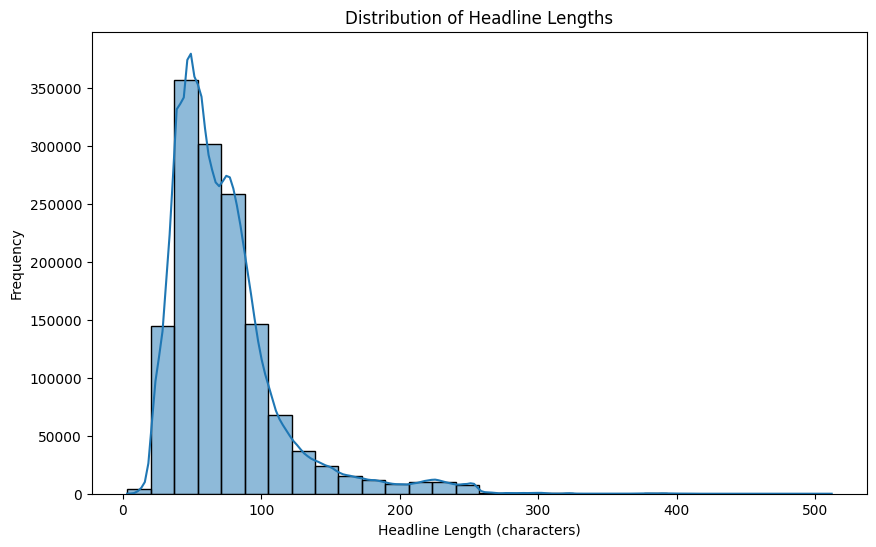

In [2]:
# Calculate headline length (number of characters)
df['headline_length'] = df['headline'].astype(str).apply(len)

# Basic stats for headline length
print(df['headline_length'].describe())

# Optional: Visualize headline length distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], bins=30, kde=True)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length (characters)')
plt.ylabel('Frequency')
plt.show()


publisher
Benzinga Newsdesk    14750
Lisa Levin           12408
ETF Professor         4362
Paul Quintaro         4212
Benzinga Newsdesk     3177
Benzinga Insights     2332
Vick Meyer            2128
Charles Gross         1790
Hal Lindon            1470
Benzinga_Newsdesk     1239
Name: count, dtype: int64


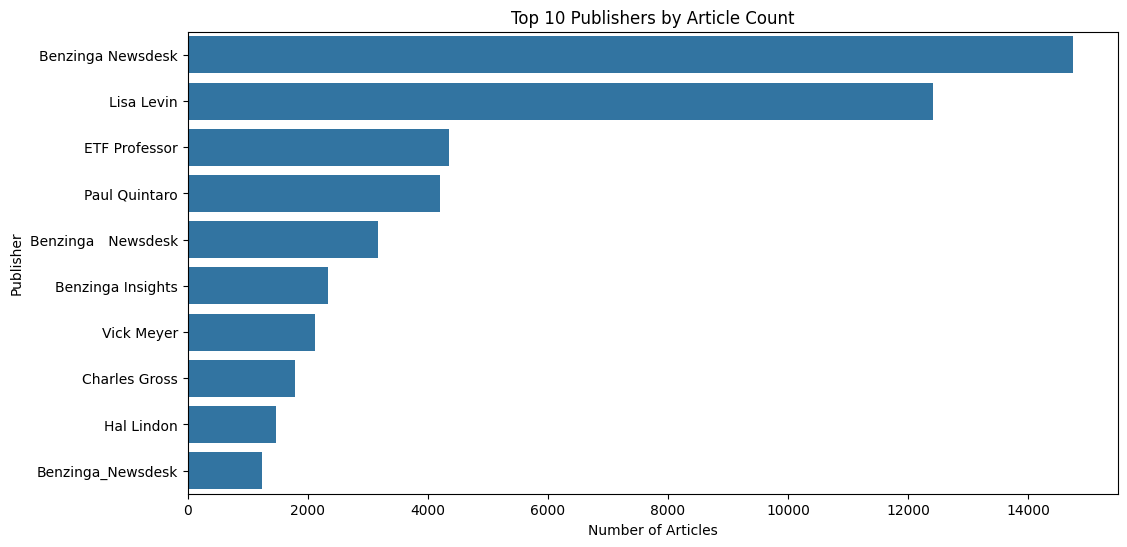

In [7]:
publisher_counts = df['publisher'].value_counts()
print(publisher_counts.head(10))  # Top 10 publishers

# Visualize top publishers
plt.figure(figsize=(12, 6))
sns.barplot(x=publisher_counts.head(10).values, y=publisher_counts.head(10).index)
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.show()



Missing dates after conversion: 1351341


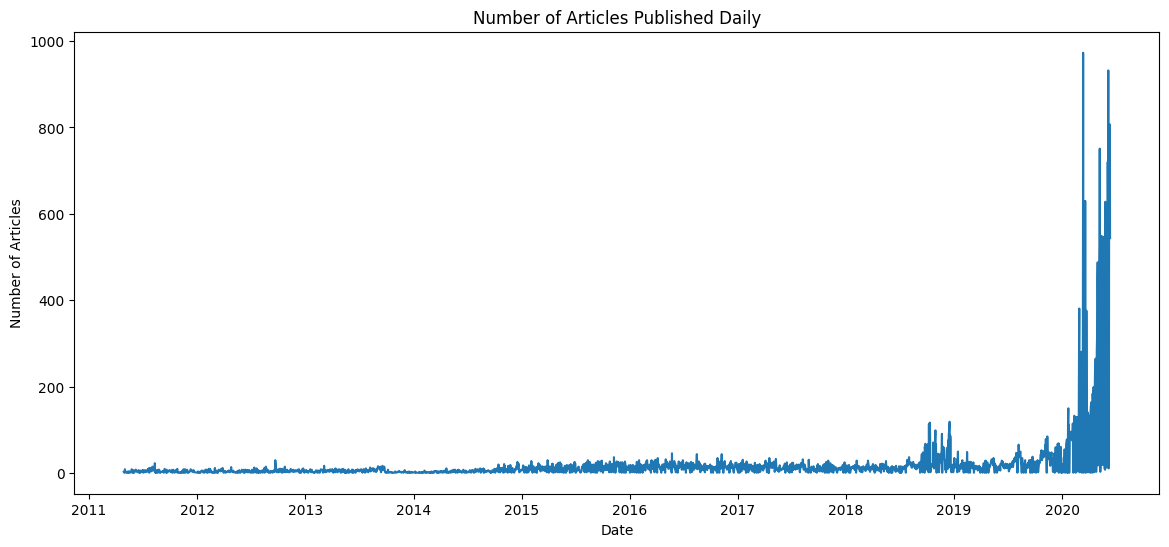

In [5]:
df['date'] = pd.to_datetime(df['date'], utc=True, errors='coerce')
print("Missing dates after conversion:", df['date'].isna().sum())
df = df.dropna(subset=['date'])
df['date_only'] = df['date'].dt.date
df['hour'] = df['date'].dt.hour

daily_counts = df.groupby('date_only').size()

import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
daily_counts.plot()
plt.title('Number of Articles Published Daily')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()



In [8]:
print(df['date'].head(20))      # Check first 20 rows
print(df['date'].sample(20))   # Check random 20 rows


0      2020-06-05 14:30:54+00:00
1      2020-06-03 14:45:20+00:00
2      2020-05-26 08:30:07+00:00
3      2020-05-22 16:45:06+00:00
4      2020-05-22 15:38:59+00:00
5      2020-05-22 15:23:25+00:00
6      2020-05-22 13:36:20+00:00
7      2020-05-22 13:07:04+00:00
8      2020-05-22 12:37:59+00:00
9      2020-05-22 12:06:17+00:00
1433   2020-06-09 14:52:15+00:00
1434   2020-06-08 15:29:29+00:00
1435   2020-06-08 14:32:42+00:00
1436   2020-06-05 11:40:08+00:00
1437   2020-06-04 18:46:13+00:00
1438   2020-06-03 14:19:06+00:00
1439   2020-05-27 14:10:20+00:00
1440   2020-05-27 11:32:46+00:00
1441   2020-05-26 11:47:48+00:00
1442   2020-05-18 14:50:11+00:00
Name: date, dtype: datetime64[ns, UTC]
1324149   2015-09-01 21:30:33+00:00
877873    2020-02-07 13:31:29+00:00
1040122   2017-01-18 12:30:51+00:00
964712    2018-10-22 15:59:03+00:00
1180007   2016-11-16 13:27:26+00:00
415576    2018-11-13 21:28:05+00:00
95172     2020-04-24 11:37:12+00:00
649241    2020-06-02 12:34:30+00:00
769246    201

In [9]:
print(df['date'].dtype)
print(df['date'].unique()[:10])


datetime64[ns, UTC]
<DatetimeArray>
['2020-06-05 14:30:54+00:00', '2020-06-03 14:45:20+00:00',
 '2020-05-26 08:30:07+00:00', '2020-05-22 16:45:06+00:00',
 '2020-05-22 15:38:59+00:00', '2020-05-22 15:23:25+00:00',
 '2020-05-22 13:36:20+00:00', '2020-05-22 13:07:04+00:00',
 '2020-05-22 12:37:59+00:00', '2020-05-22 12:06:17+00:00']
Length: 10, dtype: datetime64[ns, UTC]


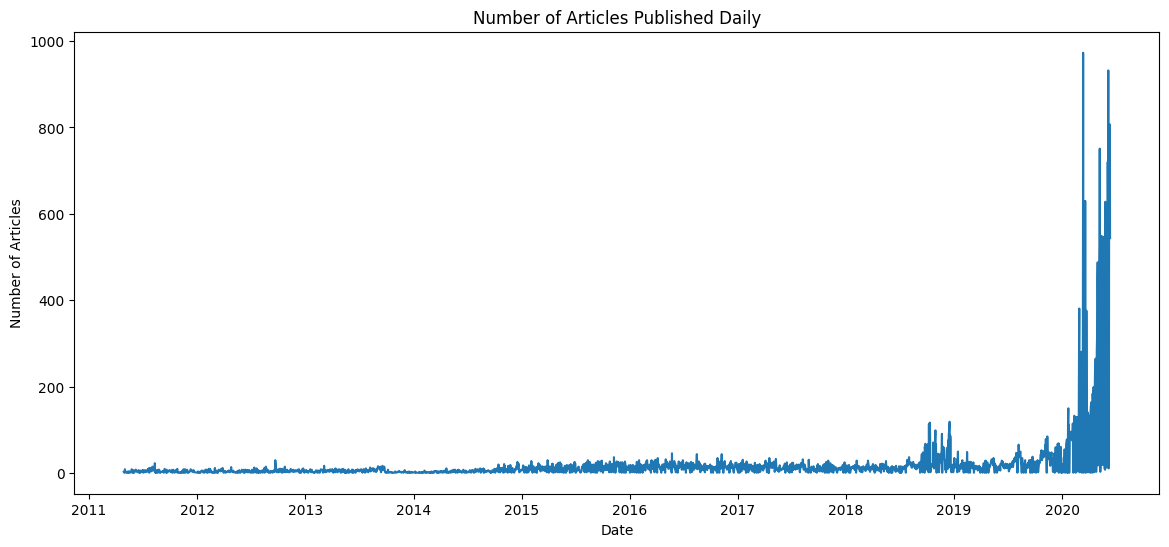

In [10]:
# Extract date parts directly
df['date_only'] = df['date'].dt.date
df['hour'] = df['date'].dt.hour

# Daily article counts
daily_counts = df.groupby('date_only').size()

import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
daily_counts.plot()
plt.title('Number of Articles Published Daily')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()


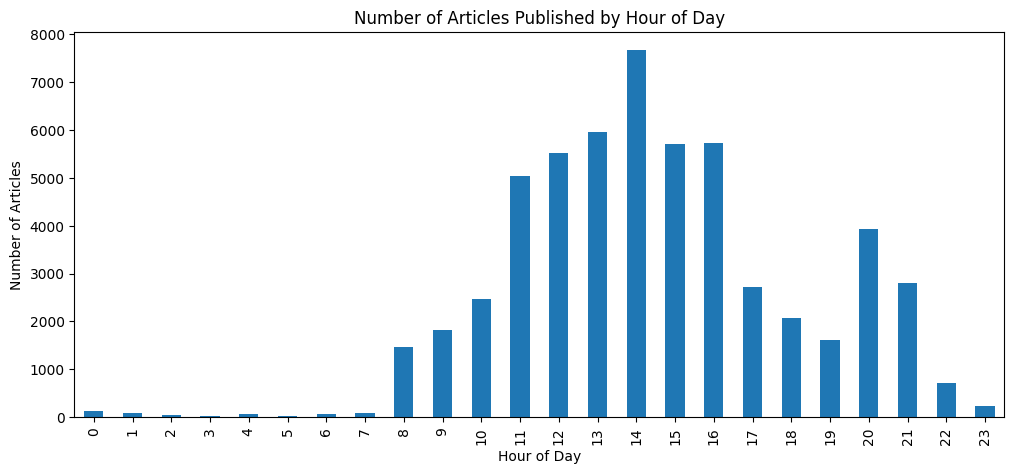

In [11]:
hourly_counts = df.groupby('hour').size()

plt.figure(figsize=(12,5))
hourly_counts.plot(kind='bar')
plt.title('Number of Articles Published by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles')
plt.show()


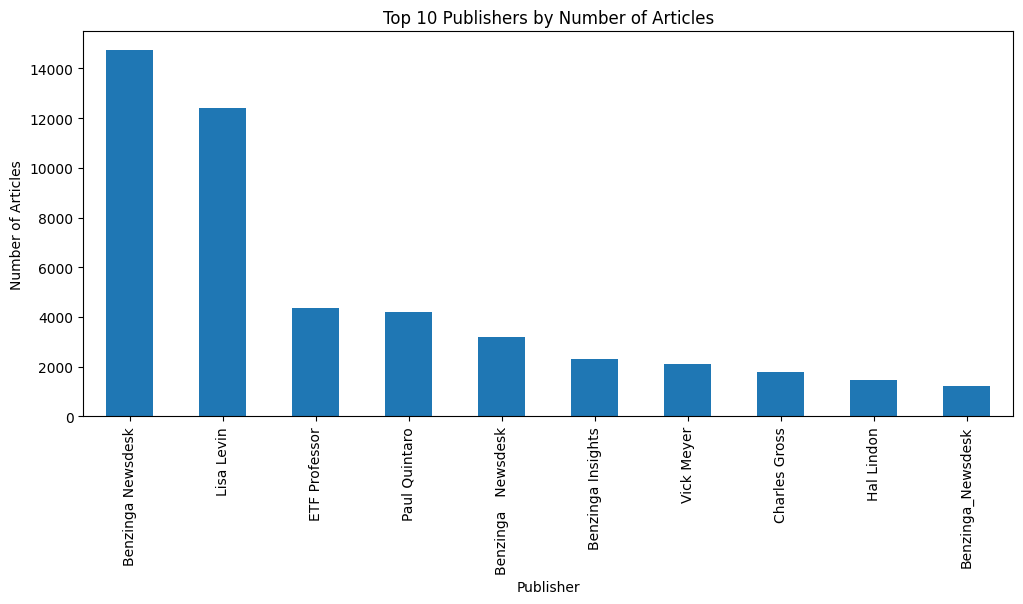

In [12]:
top_publishers = df['publisher'].value_counts().head(10)

plt.figure(figsize=(12,5))
top_publishers.plot(kind='bar')
plt.title('Top 10 Publishers by Number of Articles')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.show()


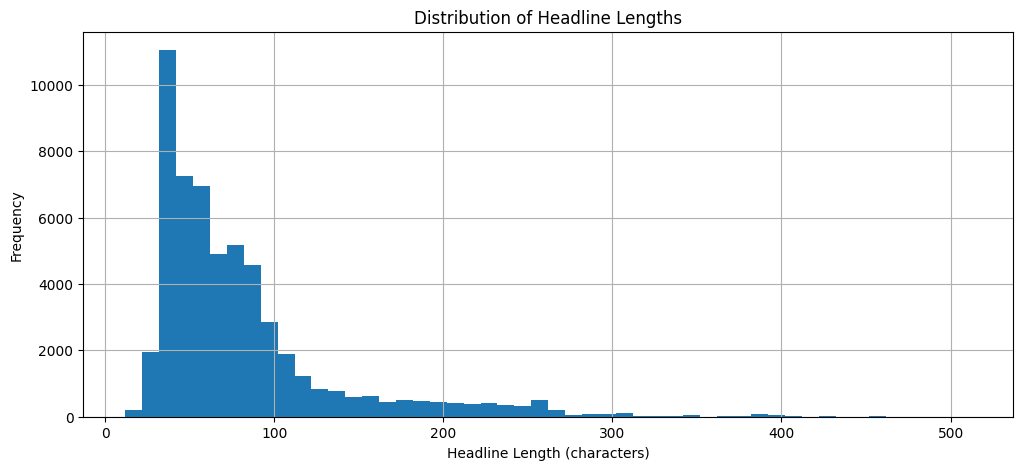

In [13]:
plt.figure(figsize=(12,5))
df['headline_length'].hist(bins=50)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length (characters)')
plt.ylabel('Frequency')
plt.show()


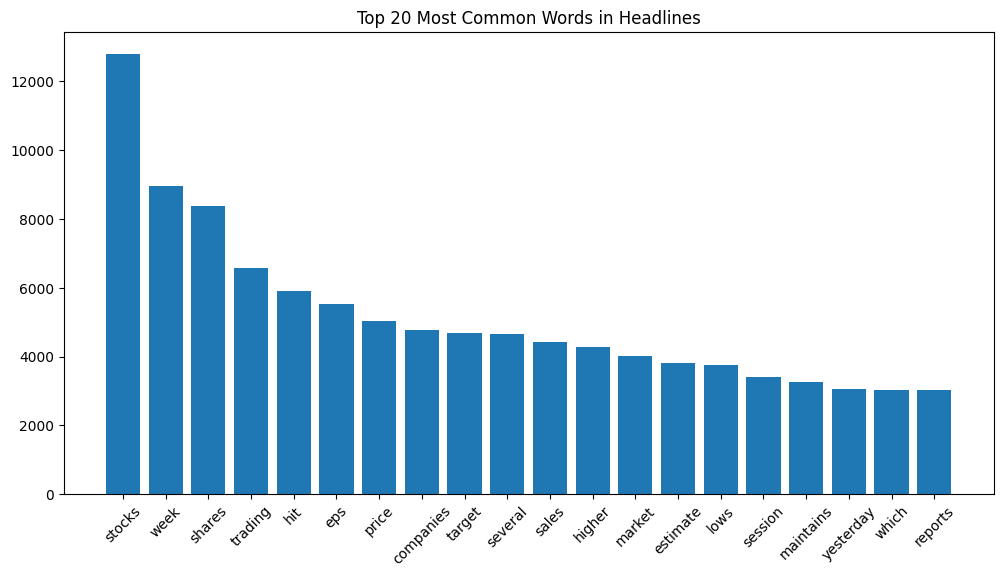

In [14]:
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt

# Assuming your dataframe is 'df' and headline column is 'headline'

# Combine all headlines into one large string
all_headlines = ' '.join(df['headline'].dropna()).lower()

# Remove punctuation and non-alphabetic characters
cleaned_text = re.sub(r'[^a-z\s]', '', all_headlines)

# Split into words
words = cleaned_text.split()

# Remove stopwords (common words like 'the', 'and', etc.)
# You can use a basic stopword list or install nltk to get a better list
stopwords = set([
    'the', 'and', 'to', 'of', 'in', 'a', 'for', 'on', 'with', 'at', 'by', 'from', 
    'is', 'that', 'as', 'an', 'are', 'be', 'was', 'it', 'this', 'has', 'have', 'will',
    'not', 'but', 'or', 'if', 'we', 'you', 'your', 'they', 'their', 'more', 'new'
])

filtered_words = [word for word in words if word not in stopwords and len(word) > 2]

# Count word frequencies
word_freq = Counter(filtered_words)

# Get the 20 most common words
most_common_words = word_freq.most_common(20)

# Convert to DataFrame for plotting
freq_df = pd.DataFrame(most_common_words, columns=['word', 'count'])

# Plotting the top 20 words
plt.figure(figsize=(12,6))
plt.bar(freq_df['word'], freq_df['count'])
plt.title('Top 20 Most Common Words in Headlines')
plt.xticks(rotation=45)
plt.show()


In [14]:
import nltk
from nltk.corpus import stopwords
import spacy

# Download stopwords if you haven't yet
nltk.download('stopwords')

# Load English stopwords
stop_words = set(stopwords.words('english'))

# Load SpaCy model
nlp = spacy.load('en_core_web_sm')

# Define a preprocessing function to tokenize, remove stopwords, and lemmatize
def preprocess(text):
    doc = nlp(text.lower())  # lowercase and tokenize
    tokens = [token.lemma_ for token in doc if token.is_alpha and token.text not in stop_words]
    return tokens

# Apply preprocessing to the 'headline' column, ignoring missing values
texts = df['headline'].dropna().map(preprocess).tolist()

# Check the first preprocessed headline
print(texts[0])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\selam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['stock', 'hit', 'week', 'high', 'friday']


In [17]:
documents = ["This is the first document.", "Here is the second one."]

# Example tokenization (simple split)
texts = [doc.split() for doc in documents]

# Now join tokens back into strings
joined_texts = [' '.join(tokens) for tokens in texts]

# Continue with TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(joined_texts)

print(X.shape)


(2, 8)


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Join tokens back into strings
joined_texts = [' '.join(tokens) for tokens in texts]

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features

# Fit and transform the texts
X = vectorizer.fit_transform(joined_texts)

# Check shape of resulting matrix
print(X.shape)



(2, 8)


In [19]:
print(df.columns)


Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock',
       'headline_length', 'date_only', 'hour'],
      dtype='object')


In [20]:
print(df['headline_length'].describe())


count    55987.000000
mean        80.015254
std         56.126094
min         12.000000
25%         42.000000
50%         63.000000
75%         91.000000
max        512.000000
Name: headline_length, dtype: float64


In [21]:
publisher_counts = df['publisher'].value_counts()
print(publisher_counts.head(10))  # Top 10 publishers by article count


publisher
Benzinga Newsdesk    14750
Lisa Levin           12408
ETF Professor         4362
Paul Quintaro         4212
Benzinga Newsdesk     3177
Benzinga Insights     2332
Vick Meyer            2128
Charles Gross         1790
Hal Lindon            1470
Benzinga_Newsdesk     1239
Name: count, dtype: int64


In [22]:
df['date'] = pd.to_datetime(df['date'], utc=True)
df['date_only'] = df['date'].dt.date


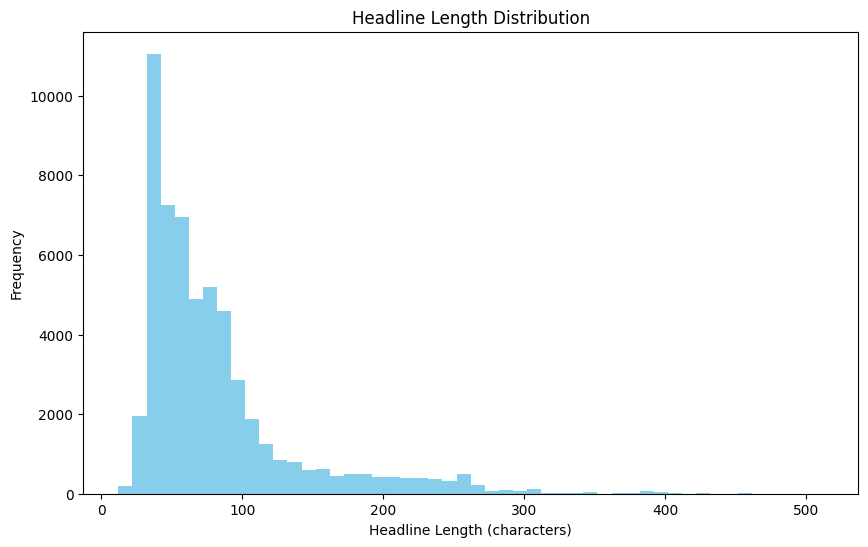

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df['headline_length'], bins=50, color='skyblue')
plt.title('Headline Length Distribution')
plt.xlabel('Headline Length (characters)')
plt.ylabel('Frequency')
plt.show()



In [24]:
publisher_counts = df['publisher'].value_counts()
print(publisher_counts.head(10))


publisher
Benzinga Newsdesk    14750
Lisa Levin           12408
ETF Professor         4362
Paul Quintaro         4212
Benzinga Newsdesk     3177
Benzinga Insights     2332
Vick Meyer            2128
Charles Gross         1790
Hal Lindon            1470
Benzinga_Newsdesk     1239
Name: count, dtype: int64


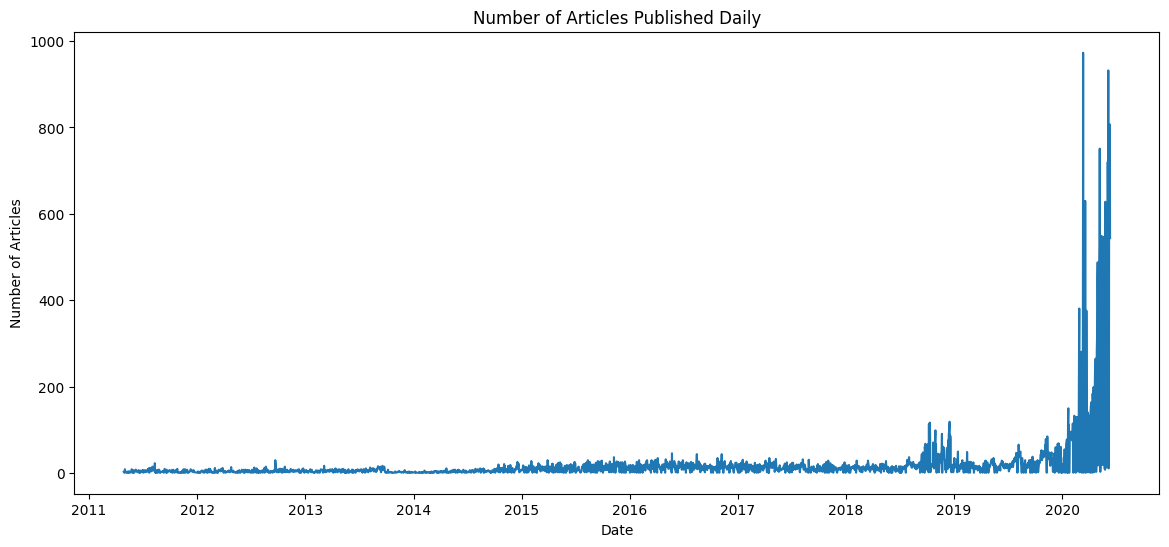

In [25]:
daily_counts = df.groupby('date_only').size()
plt.figure(figsize=(14,6))
daily_counts.plot()
plt.title('Number of Articles Published Daily')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Assuming 'texts' is a list of tokenized headlines after preprocessing
# Convert token list to strings for vectorizer
texts_joined = [' '.join(text) for text in texts]

# Vectorize words with adjusted min_df and max_df for small datasets
vectorizer = CountVectorizer(max_df=1.0, min_df=1, stop_words='english')
X = vectorizer.fit_transform(texts_joined)

# LDA topic modeling (choose n_topics)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Show top words per topic
def print_topics(model, feature_names, n_top_words):
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx+1}:")
        print([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])

print_topics(lda, vectorizer.get_feature_names_out(), 10)


Topic 1:
['document', 'second']
Topic 2:
['document', 'second']
Topic 3:
['document', 'second']
Topic 4:
['second', 'document']
Topic 5:
['document', 'second']
